In [372]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [373]:
m = 256
n = 256

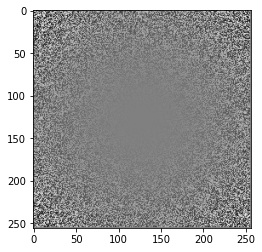

In [374]:
phase = np.random.normal(size=(m, n)) * np.pi
x = np.arange(-m/2, m/2)
y = np.arange(-n/2, n/2)
z = np.zeros((m, n))
for i in range(m-1):
    for j in range(n-1):
        z[i][j] = x[i] ** 2 + y[j] ** 2
b = 99999
mag = 1 - np.exp(-np.pi*z / b**2)
noise = mag * (np.cos(phase) + 1j * np.sin(phase))
plt.imshow(noise.real, cmap='gray')

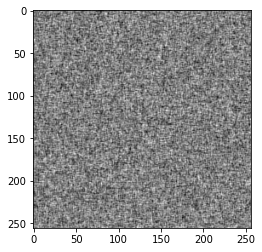

In [375]:
inverse_noise = np.fft.ifft2(noise)
in_real = (inverse_noise.real - inverse_noise.real.min()) / (inverse_noise.real.max() - inverse_noise.real.min())
plt.imshow(in_real, cmap='gray')
# plt.plot(in_real)

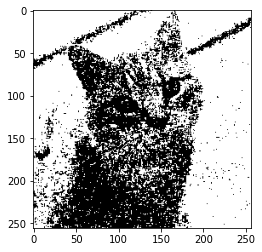

In [376]:
image = cv2.imread('cat_hw.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (int(m), int(n)))
image = (image - image.min()) / (image.max() - image.min())

added = cv2.add(image,in_real)
_, added = cv2.threshold(added, 1, 2, cv2.THRESH_BINARY)
plt.imshow(added, cmap='gray')